# ANALISIS RISIKO STROKE MENGGUNAKAN ANALISIS DISKRIMINAN LINEAR (LDA) PADA DATASET PREDIKSI STROKE


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis (EDA)

In [2]:
# Read Data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# drop data 'id'
data = data.drop(columns=['id'])

In [4]:
# cek data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Visualisasi Data

In [5]:
df = data.copy()
# Mengubah variabel hypertension, heart_disease, dan stroke menjadi kategorik
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})
df['heart_disease'] = df['heart_disease'].replace({0: 'No', 1: 'Yes'})
df['stroke'] = df['stroke'].replace({0: 'No', 1: 'Yes'})

In [6]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [7]:
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [8]:
df.describe(include="object")

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,No,No,Yes,Private,Urban,never smoked,No
freq,2994,4612,4834,3353,2925,2596,1892,4861


C:\Users\ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


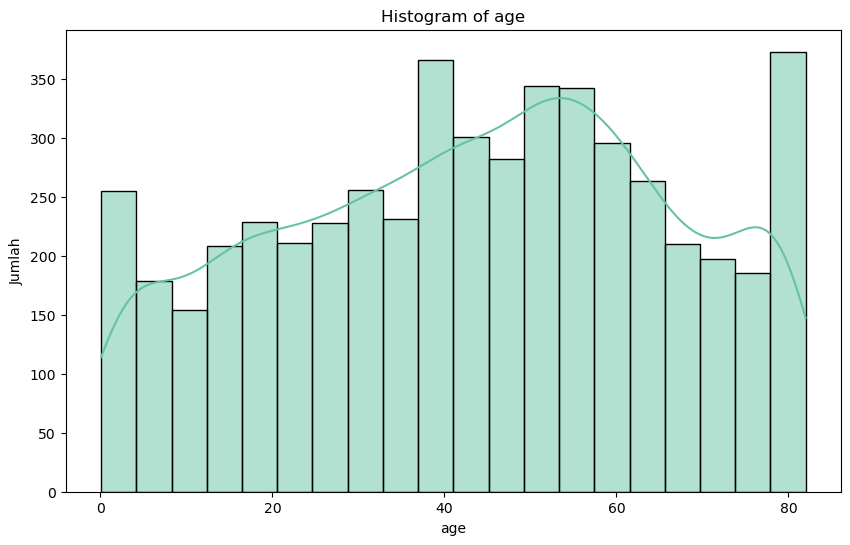

C:\Users\ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


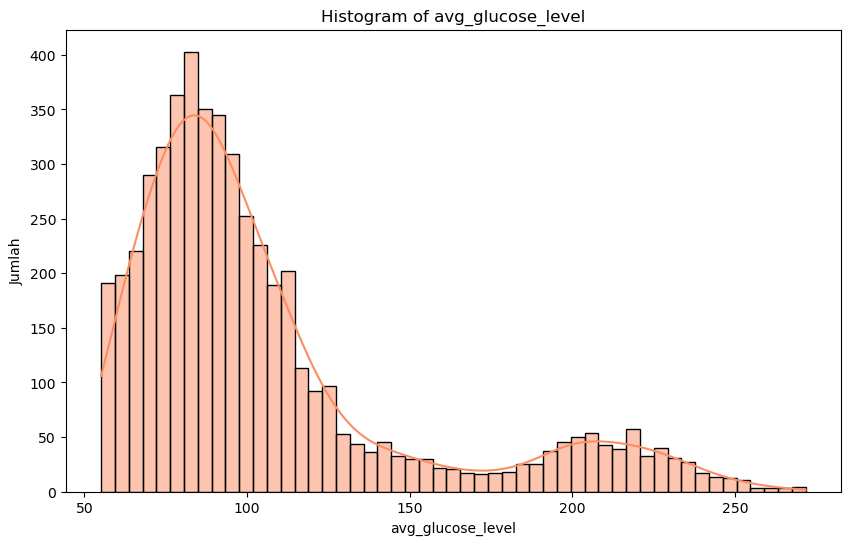

C:\Users\ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


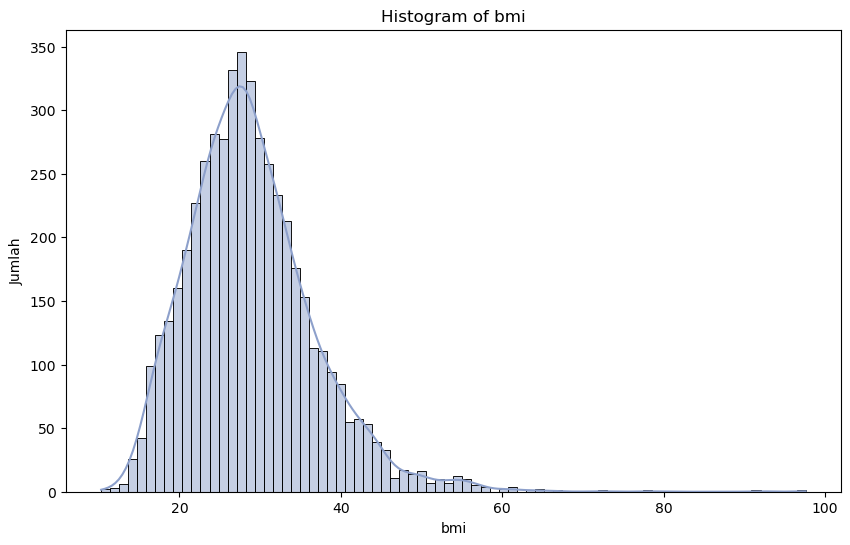

In [9]:
# plotting
# Warna yang digunakan untuk plot
colors = sns.color_palette("Set2", 10)

# Variabel numerik
numerical_vars = ['age', 'avg_glucose_level', 'bmi']

# Plot untuk variabel numerik
for i, var in enumerate(numerical_vars):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, kde=True, color=colors[i])
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Jumlah')
    plt.show()



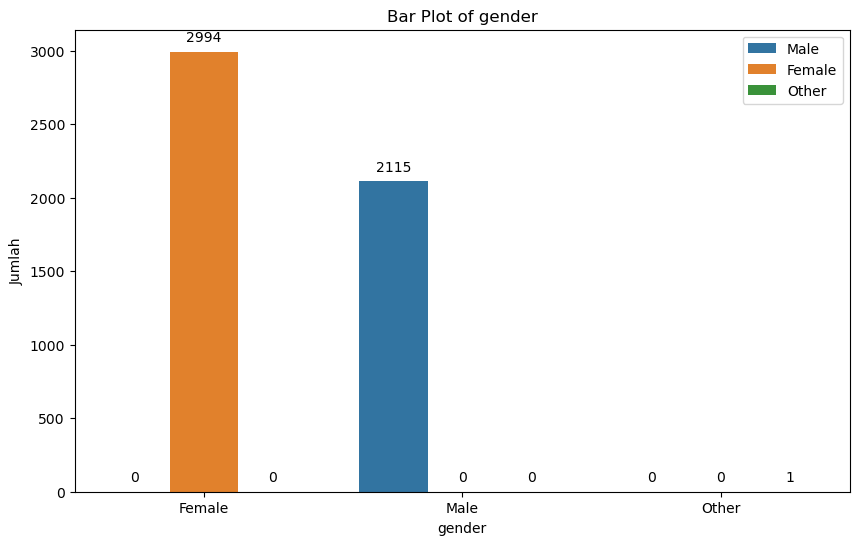

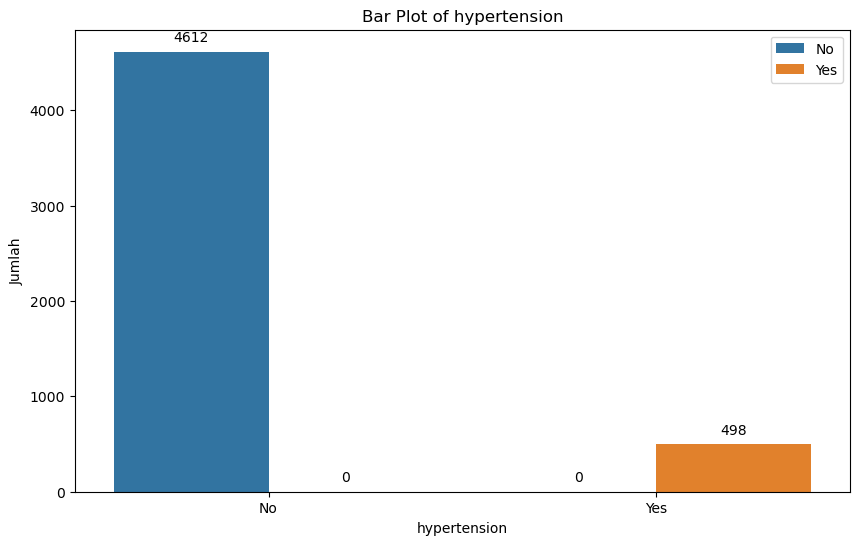

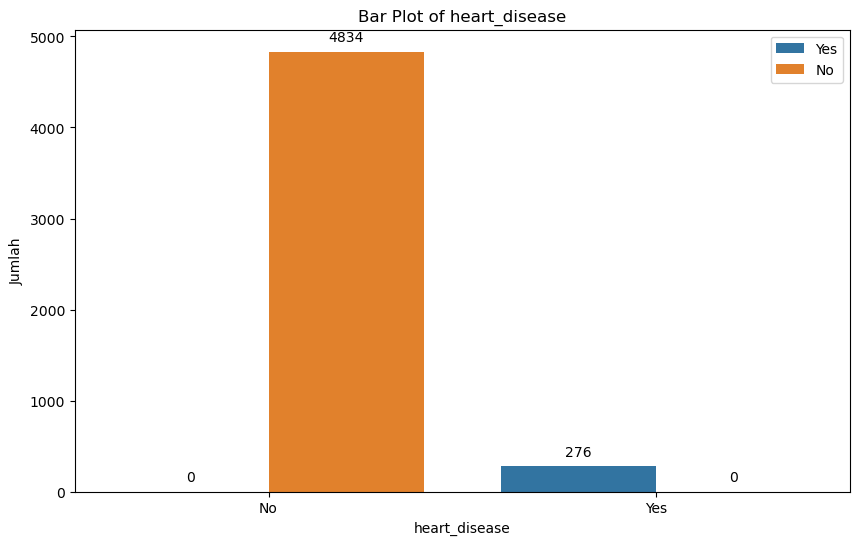

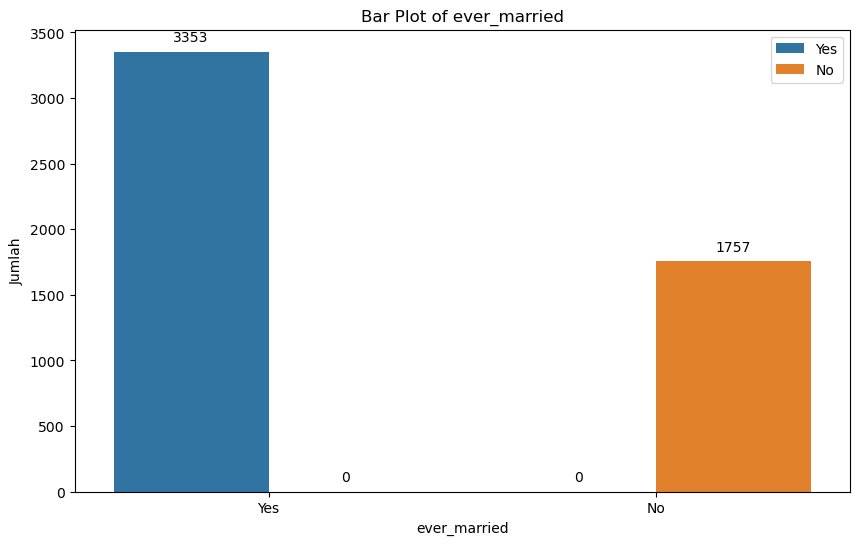

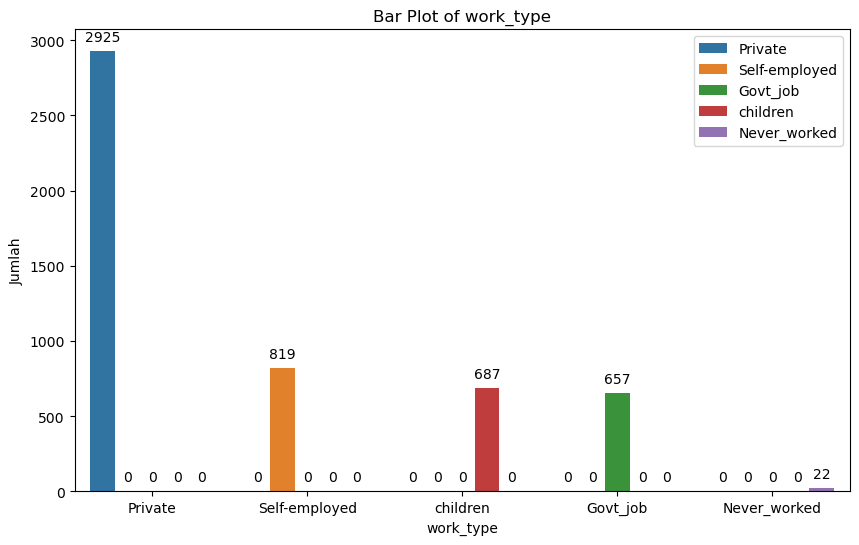

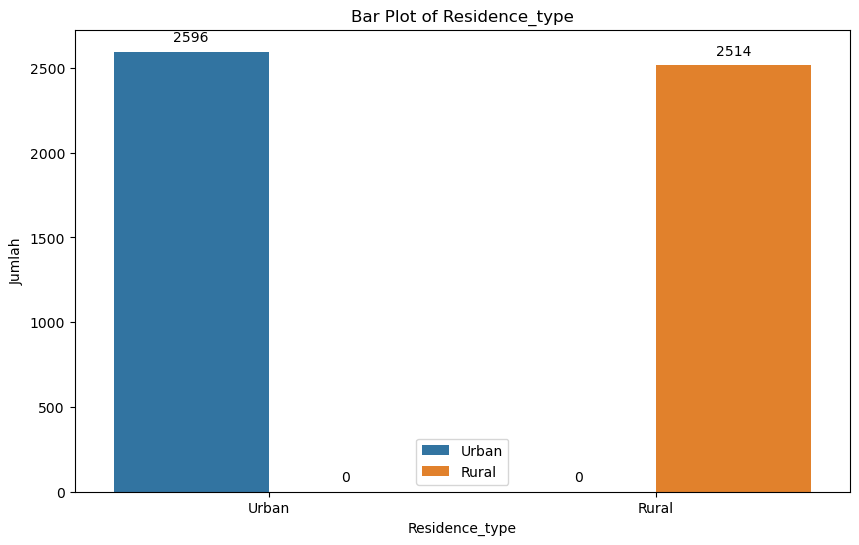

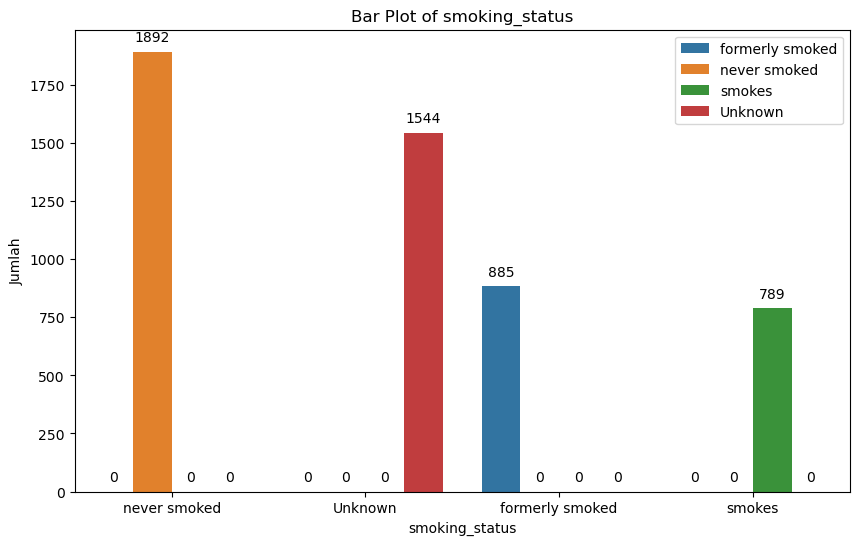

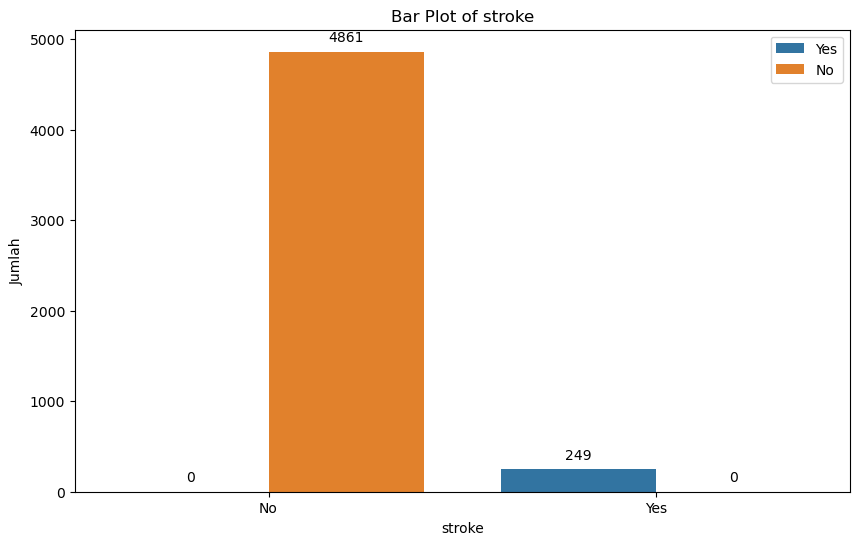

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variabel kategorik
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Plot untuk variabel kategorik
for i, var in enumerate(categorical_vars):
    plt.figure(figsize=(10, 6))
    order = df[var].value_counts().index
    ax = sns.countplot(data=df, x=var, order=order, hue=var)
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Jumlah')

    # Menambahkan nilai count di atas bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

    # Menambahkan legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels)
    plt.show()


# Pre-Processing Data

In [11]:
# Menghapus baris yang memiliki gender 'Other'
data = data[data['gender'] != 'Other']

# Memastikan perubahan diterapkan
print(data['gender'].value_counts())

gender
Female    2994
Male      2115
Name: count, dtype: int64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


### Missing Value

In [13]:
# Cek Missing value
data.isna().sum()/len(data)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039342
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Mengkodekan variabel kategorik
label_encoders = {}
kolom_kategoris = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for kolom in kolom_kategoris:
    le = LabelEncoder()
    data[kolom] = le.fit_transform(data[kolom].astype(str))
    label_encoders[kolom] = le

# Memisahkan dataset menjadi fitur dan target untuk imputasi BMI
fitur = data.drop(columns=['bmi'])
bmi = data['bmi']

# Memisahkan data menjadi set pelatihan (BMI yang tidak hilang) dan set prediksi (BMI yang hilang)
data_latih = fitur[bmi.notnull()]
bmi_latih = bmi[bmi.notnull()]

data_prediksi = fitur[bmi.isnull()]

# Melatih model regresi
regressor = LinearRegression()
regressor.fit(data_latih, bmi_latih)

# Memprediksi nilai BMI yang hilang
bmi_prediksi = regressor.predict(data_prediksi)

# Mengisi nilai yang hilang dengan nilai yang diprediksi
data.loc[data['bmi'].isnull(), 'bmi'] = bmi_prediksi

# Memeriksa apakah masih ada nilai yang hilang
print(data.isnull().sum()/len(data))


gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


In [15]:
# Cek data duplikat
duplicates = data.duplicated().sum()
print(duplicates)

0


### Deteksi Outlier

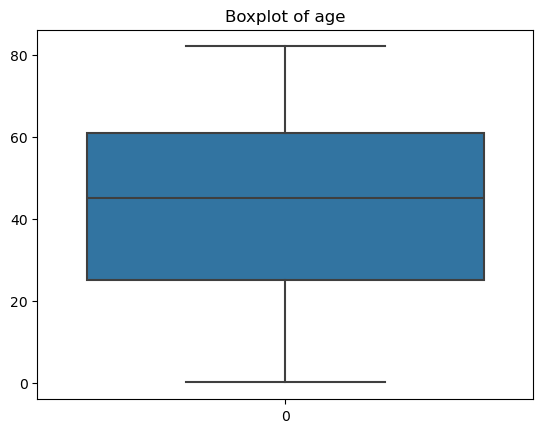

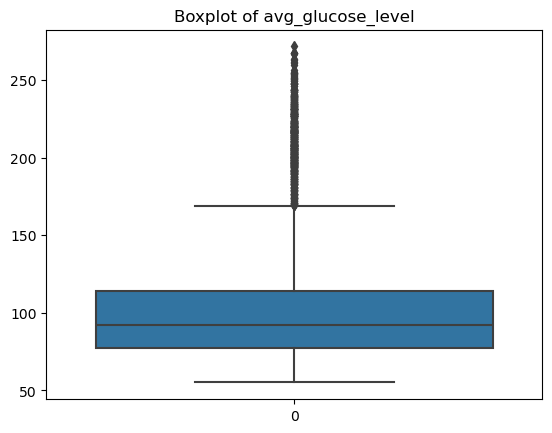

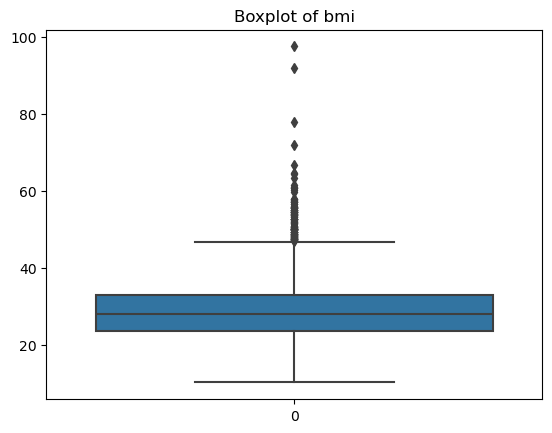

In [16]:
# Deteksi Outlier menggunakan boxplots
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


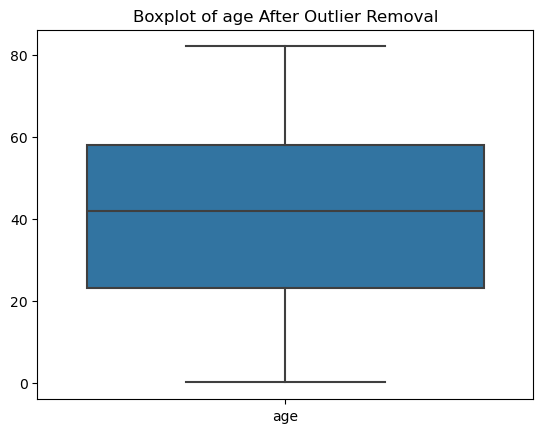

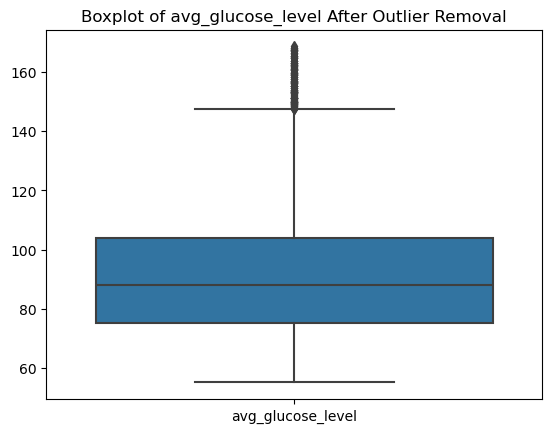

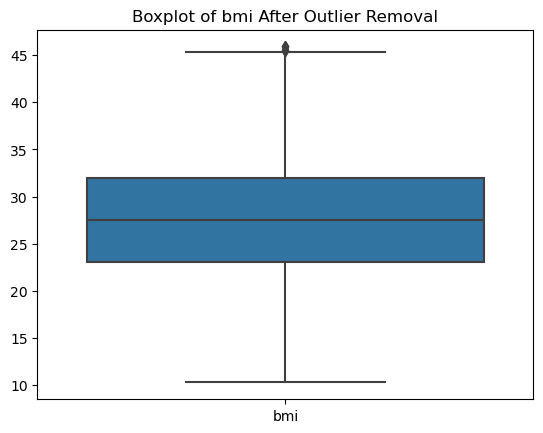

In [17]:
# Menhapus outlier berdasarkan nilai IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

# Visualisasi menggunakan boxplot setelah penghapusan missing value
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    sns.boxplot(data=data[[col]])
    plt.title(f'Boxplot of {col} After Outlier Removal')
    plt.show()

### Clean Data

In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,27.974825,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,33.542551,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [19]:
# mengembalikan data menjadi kategorik kembali
data_bersih = data.copy()
# Mapping pada variabel kategorik
gender_mapping = {1: "Male", 0: "Female", 2: "Other"}
hypertension_mapping = {0: "No", 1: "Yes"}
heart_disease_mapping = {0: "No", 1: "Yes"}
ever_married_mapping = {0: "No", 1: "Yes"}
work_type_mapping = {4: "children", 0: "Govt_job", 1: "Never_worked", 2: "Private", 3: "Self-employed"}
residence_type_mapping = {0: "Rural", 1: "Urban"}
smoking_status_mapping = {1: "formerly smoked", 2: "never smoked", 3: "smokes", 0: "Unknown"}

# mengaplikasikan kembali mappings
data_bersih['gender'] = data_bersih['gender'].replace(gender_mapping)
data_bersih['hypertension'] = data_bersih['hypertension'].replace(hypertension_mapping)
data_bersih['heart_disease'] = data_bersih['heart_disease'].replace(heart_disease_mapping)
data_bersih['ever_married'] = data_bersih['ever_married'].replace(ever_married_mapping)
data_bersih['work_type'] = data_bersih['work_type'].replace(work_type_mapping)
data_bersih['Residence_type'] = data_bersih['Residence_type'].replace(residence_type_mapping)
data_bersih['smoking_status'] = data_bersih['smoking_status'].replace(smoking_status_mapping)

data_bersih.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,No,No,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,No,No,Yes,Private,Rural,76.15,27.974825,Unknown,1
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [20]:
data_bersih.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
data_bersih.describe()

,age,avg_glucose_level,bmi,stroke
count,4385.000000,4385.000000,4385.000000,4385.000000
mean,40.891986,91.478100,27.789025,0.037628
std,22.561044,22.658576,6.563237,0.190317
min,0.080000,55.120000,10.300000,0.000000
25%,23.000000,75.080000,23.100000,0.000000
50%,42.000000,88.050000,27.500000,0.000000
75%,58.000000,104.020000,32.000000,0.000000
max,82.000000,168.680000,45.900000,1.000000


In [22]:
data_bersih.describe(include="object")

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,4385,4385,4385,4385,4385,4385,4385
unique,2,2,2,2,5,2,4
top,Female,No,No,Yes,Private,Urban,never smoked
freq,2586,4059,4213,2731,2476,2227,1593


# UJI ASUMSI

### Uji Normalitas tiap kategori

In [23]:
import pandas as pd
from scipy.stats import kstest, shapiro

X = data.drop(columns=['stroke'])
y = data['stroke']

# Memilih hanya variabel numerik dari dataset
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Misalkan X_numerik berisi variabel-variabel numerik yang akan diuji
X_numerik = data[numerical_columns]

# Membagi data berdasarkan kategori y
X_stroke_0 = X_numerik[y == 0]
X_stroke_1 = X_numerik[y == 1]

# List untuk menyimpan hasil uji
results = []

# Melakukan uji distribusi normal untuk setiap variabel numerik dalam X_numerik
for column in X_numerik.columns:
    # Uji distribusi normal menggunakan Kolmogorov-Smirnov
    ks_statistic_0, p_value_0 = kstest(X_stroke_0[column], 'norm')
    ks_statistic_1, p_value_1 = kstest(X_stroke_1[column], 'norm')

    # Uji distribusi normal menggunakan Shapiro-Wilk
    sw_statistic_0, sw_p_value_0 = shapiro(X_stroke_0[column])
    sw_statistic_1, sw_p_value_1 = shapiro(X_stroke_1[column])

    # Menyimpan hasil ke dalam list
    results.append({
        'Variable': column,
        'Group': 'stroke=0',
        'KS Statistic': ks_statistic_0,
        'KS P-value': p_value_0,
        'KS Result': 'Normal' if p_value_0 > 0.05 else 'Not Normal',
        'SW Statistic': sw_statistic_0,
        'SW P-value': sw_p_value_0,
        'SW Result': 'Normal' if sw_p_value_0 > 0.05 else 'Not Normal'
    })

    results.append({
        'Variable': column,
        'Group': 'stroke=1',
        'KS Statistic': ks_statistic_1,
        'KS P-value': p_value_1,
        'KS Result': 'Normal' if p_value_1 > 0.05 else 'Not Normal',
        'SW Statistic': sw_statistic_1,
        'SW P-value': sw_p_value_1,
        'SW Result': 'Normal' if sw_p_value_1 > 0.05 else 'Not Normal'
    })

# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Menampilkan hasil dalam bentuk tabel
results_df


,Variable,Group,KS Statistic,KS P-value,KS Result,SW Statistic,SW P-value,SW Result
0,age,stroke=0,0.957892,0.0,Not Normal,0.971475,3.280743e-28,Not Normal
1,age,stroke=1,0.993939,0.0,Not Normal,0.868481,7.669077e-11,Not Normal
2,avg_glucose_level,stroke=0,1.000000,0.0,Not Normal,0.951889,3.742551e-35,Not Normal
3,avg_glucose_level,stroke=1,1.000000,0.0,Not Normal,0.928320,2.594634e-07,Not Normal
4,bmi,stroke=0,1.000000,0.0,Not Normal,0.989892,8.352733e-17,Not Normal
5,bmi,stroke=1,1.000000,0.0,Not Normal,0.964775,3.362491e-04,Not Normal


### Uji Korelasi (Multikolinearitas)

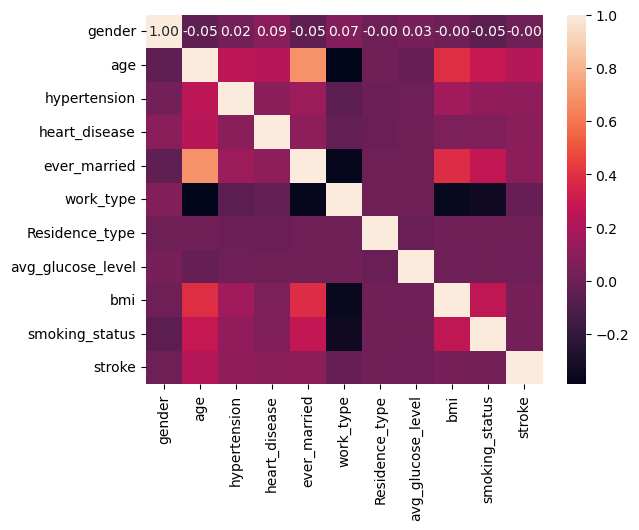

               fitur        VIF
0             gender   1.717977
1                age   9.150257
2       hypertension   1.157865
3      heart_disease   1.125600
4       ever_married   5.274642
5          work_type   4.624964
6     Residence_type   1.998551
7  avg_glucose_level  12.228971
8                bmi  15.520310
9     smoking_status   2.958639


In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
matriks_korelasi = data.corr()

# Plot heatmap
sns.heatmap(matriks_korelasi, annot=True, fmt=".2f")
plt.show()

# Menghitung VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menambahkan kolom konstan untuk perhitungan VIF
X_vif = X
data_vif = pd.DataFrame()
data_vif["fitur"] = X_vif.columns

data_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(data_vif)

In [25]:
print(matriks_korelasi)

                         gender       age  hypertension  heart_disease  \
gender             1.000000e+00 -0.046797      0.019891       0.089404   
age               -4.679684e-02  1.000000      0.252191       0.239680   
hypertension       1.989060e-02  0.252191      1.000000       0.090514   
heart_disease      8.940388e-02  0.239680      0.090514       1.000000   
ever_married      -4.536592e-02  0.685084      0.150600       0.106347   
work_type          6.725771e-02 -0.390268     -0.058668      -0.028342   
Residence_type    -4.316033e-03  0.011329     -0.009677      -0.012579   
avg_glucose_level  3.154475e-02 -0.024462      0.002199      -0.000701   
bmi               -7.257138e-07  0.387383      0.164773       0.053595   
smoking_status    -5.456055e-02  0.287968      0.116096       0.056141   
stroke            -1.689062e-03  0.227007      0.112988       0.089684   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.04536

### Uji Manova (Perbedaan Rata-Rata)


In [26]:
from statsmodels.multivariate.manova import MANOVA

# Spesifikasi model MANOVA
formula = 'C(stroke) ~ gender + age + hypertension + heart_disease + ever_married + work_type + Residence_type + avg_glucose_level + bmi + smoking_status'
maov = MANOVA.from_formula(formula, data=data)

# Jalankan MANOVA
result = maov.mv_test()

# Interpretasi hasil
print(result)


                                 Multivariate linear model
                                                                                           
-------------------------------------------------------------------------------------------
       Intercept               Value        Num DF   Den DF          F Value         Pr > F
-------------------------------------------------------------------------------------------
          Wilks' lambda             -0.0000 2.0000 4373.0000 -20261564990219452.0000 1.0000
         Pillai's trace              1.0000 2.0000 4373.0000 -20261564990219448.0000 1.0000
 Hotelling-Lawley trace -9266665899940.2930 2.0000 4373.0000 -20261564990219452.0000 1.0000
    Roy's greatest root -9266665899940.2930 2.0000 4373.0000 -20261564990219452.0000 1.0000
-------------------------------------------------------------------------------------------
                                                                                           
---------------------

### Stepwise Selection

In [27]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Usage example:
result = stepwise_selection(X, y)

print('resulting features:')
print(result)


Add  age                            with p-value 2.33433e-52
Add  ever_married                   with p-value 1.19972e-08
Add  work_type                      with p-value 8.81866e-05
Add  hypertension                   with p-value 0.000311544
Add  bmi                            with p-value 0.00823296
resulting features:
['age', 'ever_married', 'work_type', 'hypertension', 'bmi']


In [28]:
# Buat dataframe baru dengan variabel yang dipilih dan variabel target 'stroke'
selected_features = result
selected_features.append('stroke')
new_data = data[selected_features]

# Cetak data baru
data = new_data
data.head()


,age,ever_married,work_type,hypertension,bmi,stroke
2,80.0,1,2,0,32.500000,1
6,74.0,1,2,1,27.400000,1
7,69.0,0,2,0,22.800000,1
8,59.0,1,2,0,27.974825,1
9,78.0,1,2,0,24.200000,1


In [29]:
#Hasil Wilks Lambda yang baru
# Spesifikasi model MANOVA
formula = 'C(stroke) ~ age + hypertension + ever_married + work_type + bmi'
maov = MANOVA.from_formula(formula, data=data)

# Jalankan MANOVA
result = maov.mv_test()

# Interpretasi hasil
print(result)

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 2.0000 4378.0000 -84259654566788656.0000 1.0000
         Pillai's trace               1.0000 2.0000 4378.0000 -84259654566788640.0000 1.0000
 Hotelling-Lawley trace -38492304507441.1406 2.0000 4378.0000 -84259654566788672.0000 1.0000
    Roy's greatest root -38492304507441.1406 2.0000 4378.0000 -84259654566788656.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

#ANALISIS LDA

#### Scaling Data

In [30]:
# Scaling Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['stroke']))
scaled_data = pd.DataFrame(scaled_features, columns=data.drop(columns=['stroke']).columns)

# Reset indexuntuk untuk memastikan indeks cocok
scaled_data.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# Tambahkan kembali kolom target
scaled_data['stroke'] = data['stroke']

#### Split Data

In [31]:
# Split Data
from sklearn.model_selection import train_test_split

X = scaled_data.drop(columns=['stroke'])
y = scaled_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan dimensi dari data yang telah dibagi
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (3069, 5)
Dimensi X_test: (1316, 5)
Dimensi y_train: (3069,)
Dimensi y_test: (1316,)


### Model Diskriminanan

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt

# Fit the LDA model
lda = LDA()
lda.fit(X_train, y_train)

# Mendapatkan prior probabilities
priors = lda.priors_
print("Prior probabilities of groups:", priors)

# Calculate eigenvalues and eigenvectors
cov_matrix = lda.scalings_
eigenvalues = lda.explained_variance_ratio_

# Calculate canonical correlation
canonical_correlations = [sqrt(eig) for eig in eigenvalues]

print("\nCanonical Correlations:")
print(canonical_correlations)

Prior probabilities of groups: [0.96318019 0.03681981]

Canonical Correlations:
[1.0]


#### Koefisien Kanonikal

In [33]:
import pandas as pd

# Membuat DataFrame yang berisi nama kolom
kolom = {
    "Nama Kolom": ["intercept", "age", "hypertension", "ever_married", "work_type", "bmi"],
}

# Membuat DataFrame untuk menyimpan koefisien kanonikal secara vertikal
coef_df = pd.DataFrame(columns=["Variabel", "Koefisien"])

# Menambahkan nama kolom dan koefisien kanonikal ke dalam DataFrame
for idx, nama_kolom in enumerate(kolom["Nama Kolom"]):
    if nama_kolom == "intercept":
        koefisien = lda.intercept_[0]
    else:
        koefisien = lda.coef_[0][idx-1]
    coef_df.loc[idx] = [nama_kolom, koefisien]

# Menampilkan tabel koefisien kanonikal
coef_df


,Variabel,Koefisien
0,intercept,-4.191876
1,age,1.841818
2,hypertension,-0.557431
3,ever_married,0.261933
4,work_type,0.259318
5,bmi,-0.300338


## Hasil Klasifikasi

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the test set results
y_pred = lda.predict(X_test)

# Predict the discriminant scores for the test set
discriminant_scores = lda.decision_function(X_test)

# Mendapatkan mean dari fungsi diskriminan untuk dua kelas
mean_score_class_0 = discriminant_scores[y_test == 0].mean()
mean_score_class_1 = discriminant_scores[y_test == 1].mean()

# Membuat tabel output
group_means = pd.DataFrame({
    'Class': ['Class 0', 'Class 1'],
    'Mean Discriminant Score': [mean_score_class_0, mean_score_class_1]
})

print("Group Means:")
print(group_means)

# Menghitung cutting score
n0 = np.sum(y_test == 0)
n1 = np.sum(y_test == 1)
cutting_score = ((n1 * mean_score_class_0) + (n0 * mean_score_class_1)) / (n0 + n1)
print("\nCutting Score:", cutting_score)


# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Group Means:
     Class  Mean Discriminant Score
0  Class 0                -4.246418
1  Class 1                -2.331967

Cutting Score: -2.4076144614497785

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1264
           1       0.40      0.04      0.07        52

    accuracy                           0.96      1316
   macro avg       0.68      0.52      0.52      1316
weighted avg       0.94      0.96      0.94      1316



In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[1261    3]
 [  50    2]]

Accuracy: 0.959726443768997
